In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
import os

In [ ]:
os.chdir("/content/drive/MyDrive/Naidu")

In [ ]:
df=pd.read_csv("heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
X=df.drop(columns='target')

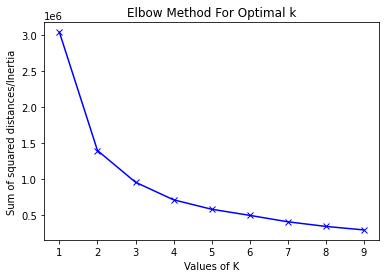

In [ ]:

#Elbow Method
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans_model = cluster.KMeans(n_clusters=num_clusters)
 kmeans_model.fit(X[["trestbps","chol"]])
 Sum_of_squared_distances.append(kmeans_model.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans=cluster.KMeans(n_clusters=2,init='k-means++')

In [ ]:
#Considering Two attributes trestbps and chol
kmeans=kmeans.fit(X[["trestbps","chol"]])

In [ ]:
X['Clusters']=kmeans.labels_

In [ ]:

#Centroids
centers = np.array(kmeans.cluster_centers_)
centers

array([[129.75267176, 215.95267176],
       [134.9027027 , 299.19189189]])

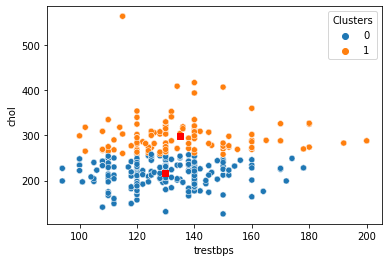

In [ ]:
#Red Square Indicates Centroids
sns.scatterplot(x="trestbps",y="chol",hue="Clusters",data=X)
plt.scatter(centers[:,0], centers[:,1], marker="s", color='r')